In [1]:
import pandas as pd
import requests
from sodapy import Socrata
import getpass
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [117]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Getting the data

In [3]:
MyAppToken = getpass.getpass()

········


In [4]:
password = getpass.getpass()

········


In [41]:

client = Socrata("data.cityofnewyork.us",
                 MyAppToken,
                 username="chesneau.agathe@gmail.com",
                 password=password)


results = client.get("kybe-9iex", limit=600000)

grad_out = pd.DataFrame.from_records(results)

In [42]:
grad_out.head()

,dbn,school_name,demographic_category,demographic_variable,cohort_year,cohort,total_cohort,total_grads,total_grads_of_cohort,total_regents,total_regents_of_cohort,total_regents_of_grads,advanced_regents,advanced_regents_of_cohort,advanced_regents_of_grads,regents_w_o_advanced,regents_w_o_advanced_of_cohort,regents_w_o_advanced_of_grads,local,local_of_cohort,local_of_grads,still_enrolled,still_enrolled_of_cohort,dropped_out,dropped_out_of_cohort
0,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2014,4 year August,29,28,96.6,25,86.2,89.3,0,0.0,0.0,25,86.2,89.3,3,10.3,10.7,0,0.0,1,3.4
1,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2013,4 year August,36,25,69.4,23,63.9,92.0,0,0.0,0.0,23,63.9,92.0,2,5.6,8.0,3,8.3,7,19.4
2,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2012,4 year August,44,24,54.5,20,45.5,83.3,1,2.3,4.2,19,43.2,79.2,4,9.1,16.7,10,22.7,10,22.7
3,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2011,4 year August,73,46,63.0,41,56.2,89.1,0,0.0,0.0,41,56.2,89.1,5,6.8,10.9,18,24.7,7,9.6
4,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2010,4 year August,61,26,42.6,26,42.6,100.0,1,1.6,3.8,25,41.0,96.2,0,0.0,0.0,18,29.5,17,27.9


In [43]:
results2 = client.get("45j8-f6um", limit=10000)
# 2013-2019

demographics_school = pd.DataFrame.from_records(results2)

In [44]:
demographics_school.head()

,dbn,school_name,year,total_enrollment,grade_pk_half_day_full_day,grade_k,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,female,female_1,male,male_1,asian,asian_1,black,black_1,hispanic,hispanic_1,multiple_race_categories,multiple_race_categories_1,white,white_1,students_with_disabilities,students_with_disabilities_1,english_language_learners,english_language_learners_1,poverty,poverty_1,economic_need_index
0,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,24,0,0,0,0,0,0,0,84,0.459,99,0.541,8,0.044,65,0.355,107,0.585,1,0.005,2,0.011,64,0.35,17,0.093,169,0.923,0.93
1,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,83,0.472,93,0.528,9,0.051,57,0.324,105,0.597,3,0.017,2,0.011,60,0.341,16,0.091,149,0.847,0.889
2,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,83,0.466,95,0.534,14,0.079,51,0.287,105,0.59,4,0.022,4,0.022,51,0.287,12,0.067,152,0.854,0.882
3,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,99,0.521,91,0.479,20,0.105,52,0.274,110,0.579,2,0.011,6,0.032,49,0.258,8,0.042,161,0.847,0.89
4,01M015,P.S. 015 Roberto Clemente,2018-19,174,13,20,33,30,30,20,28,0,0,0,0,0,0,0,85,0.489,89,0.511,24,0.138,48,0.276,95,0.546,1,0.006,6,0.034,38,0.218,8,0.046,145,0.833,0.88


In [45]:
len(grad_out['school_name'].unique())

549

In [46]:
len(demographics_school['school_name'].unique())

1831

In [47]:
demographics_school['school_name'] = demographics_school['school_name'].str.lower()
grad_out['school_name'] = grad_out['school_name'].str.lower()

# Making numerical columns

In [48]:
lst = ['total_cohort', 'total_grads',
       'total_grads_of_cohort', 'total_regents', 'total_regents_of_cohort',
       'total_regents_of_grads', 'advanced_regents',
       'advanced_regents_of_cohort', 'advanced_regents_of_grads',
       'regents_w_o_advanced', 'regents_w_o_advanced_of_cohort',
       'regents_w_o_advanced_of_grads', 'local', 'local_of_cohort',
       'local_of_grads', 'still_enrolled', 'still_enrolled_of_cohort',
       'dropped_out', 'dropped_out_of_cohort']

for col in lst :
    grad_out[col] = pd.to_numeric(grad_out[col],errors ='coerce')

In [49]:
lst = ['total_enrollment',
       'grade_pk_half_day_full_day', 'grade_k', 'grade_1', 'grade_2',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'female', 'female_1',
       'male', 'male_1', 'asian', 'asian_1', 'black', 'black_1', 'hispanic',
       'hispanic_1', 'multiple_race_categories', 'multiple_race_categories_1',
       'white', 'white_1', 'students_with_disabilities',
       'students_with_disabilities_1', 'english_language_learners',
       'english_language_learners_1', 'poverty', 'poverty_1',
       'economic_need_index']

for col in lst :
    demographics_school[col] = pd.to_numeric(demographics_school[col],errors ='coerce')

In [50]:
grad_out = grad_out.dropna()

# Making csv file

In [51]:
grad_out.to_csv(path_or_buf='./grad.csv', index=False)

In [52]:
grad_out.head()

,dbn,school_name,demographic_category,demographic_variable,cohort_year,cohort,total_cohort,total_grads,total_grads_of_cohort,total_regents,total_regents_of_cohort,total_regents_of_grads,advanced_regents,advanced_regents_of_cohort,advanced_regents_of_grads,regents_w_o_advanced,regents_w_o_advanced_of_cohort,regents_w_o_advanced_of_grads,local,local_of_cohort,local_of_grads,still_enrolled,still_enrolled_of_cohort,dropped_out,dropped_out_of_cohort
0,01M292,orchard collegiate academy,All Students,All Students,2014,4 year August,29,28.0,96.6,25.0,86.2,89.3,0.0,0.0,0.0,25.0,86.2,89.3,3.0,10.3,10.7,0.0,0.0,1.0,3.4
1,01M292,orchard collegiate academy,All Students,All Students,2013,4 year August,36,25.0,69.4,23.0,63.9,92.0,0.0,0.0,0.0,23.0,63.9,92.0,2.0,5.6,8.0,3.0,8.3,7.0,19.4
2,01M292,orchard collegiate academy,All Students,All Students,2012,4 year August,44,24.0,54.5,20.0,45.5,83.3,1.0,2.3,4.2,19.0,43.2,79.2,4.0,9.1,16.7,10.0,22.7,10.0,22.7
3,01M292,orchard collegiate academy,All Students,All Students,2011,4 year August,73,46.0,63.0,41.0,56.2,89.1,0.0,0.0,0.0,41.0,56.2,89.1,5.0,6.8,10.9,18.0,24.7,7.0,9.6
4,01M292,orchard collegiate academy,All Students,All Students,2010,4 year August,61,26.0,42.6,26.0,42.6,100.0,1.0,1.6,3.8,25.0,41.0,96.2,0.0,0.0,0.0,18.0,29.5,17.0,27.9


# Building model

In [53]:
ml_df = grad_out[grad_out['demographic_variable']=='All Students'].copy()

In [54]:
# for checking which schools are in both df : 



lst = []
for el in ml_df['school_name']:
    if el in demographics_school['school_name'].unique():
        x = True
    else :
        x = False
    lst.append(x)    
        
ml_df['name_check'] = lst
    
    
    

In [55]:
ml_df = ml_df[ml_df['name_check']==True].reset_index()

In [56]:
len(ml_df)

16992

In [57]:
ml_df.head()

,index,dbn,school_name,demographic_category,demographic_variable,cohort_year,cohort,total_cohort,total_grads,total_grads_of_cohort,total_regents,total_regents_of_cohort,total_regents_of_grads,advanced_regents,advanced_regents_of_cohort,advanced_regents_of_grads,regents_w_o_advanced,regents_w_o_advanced_of_cohort,regents_w_o_advanced_of_grads,local,local_of_cohort,local_of_grads,still_enrolled,still_enrolled_of_cohort,dropped_out,dropped_out_of_cohort,name_check
0,0,01M292,orchard collegiate academy,All Students,All Students,2014,4 year August,29,28.0,96.6,25.0,86.2,89.3,0.0,0.0,0.0,25.0,86.2,89.3,3.0,10.3,10.7,0.0,0.0,1.0,3.4,True
1,1,01M292,orchard collegiate academy,All Students,All Students,2013,4 year August,36,25.0,69.4,23.0,63.9,92.0,0.0,0.0,0.0,23.0,63.9,92.0,2.0,5.6,8.0,3.0,8.3,7.0,19.4,True
2,2,01M292,orchard collegiate academy,All Students,All Students,2012,4 year August,44,24.0,54.5,20.0,45.5,83.3,1.0,2.3,4.2,19.0,43.2,79.2,4.0,9.1,16.7,10.0,22.7,10.0,22.7,True
3,3,01M292,orchard collegiate academy,All Students,All Students,2011,4 year August,73,46.0,63.0,41.0,56.2,89.1,0.0,0.0,0.0,41.0,56.2,89.1,5.0,6.8,10.9,18.0,24.7,7.0,9.6,True
4,4,01M292,orchard collegiate academy,All Students,All Students,2010,4 year August,61,26.0,42.6,26.0,42.6,100.0,1.0,1.6,3.8,25.0,41.0,96.2,0.0,0.0,0.0,18.0,29.5,17.0,27.9,True


In [58]:
ml_df['year'] = ''
for i in range(len(ml_df)-1):
    ml_df['year'][i] = int(ml_df['cohort_year'][i]) + int(re.search('\d',str(ml_df['cohort'][i]))[0])


<ipython-input-58-e1e7200b9f81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df['year'][i] = int(ml_df['cohort_year'][i]) + int(re.search('\d',str(ml_df['cohort'][i]))[0])


In [59]:
ml_df['year'].value_counts()

2018    1925
2017    1868
2016    1800
2015    1729
2014    1655
2013    1566
2012    1492
2011    1406
2010    1047
2009     961
2008     602
2007     500
2006     303
2005     137
           1
Name: year, dtype: int64

In [60]:
def clean_year(x):
    x_clean = re.sub('\d\d-','',x)
    return x_clean

In [61]:
demographics_school['year'] = demographics_school['year'].apply(clean_year)

In [62]:
demographics_school['year'].value_counts()

2019    1841
2018    1815
2017    1795
2016    1779
2015    1743
Name: year, dtype: int64

In [63]:
demographics_school.columns

Index(['dbn', 'school_name', 'year', 'total_enrollment',
       'grade_pk_half_day_full_day', 'grade_k', 'grade_1', 'grade_2',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'female', 'female_1',
       'male', 'male_1', 'asian', 'asian_1', 'black', 'black_1', 'hispanic',
       'hispanic_1', 'multiple_race_categories', 'multiple_race_categories_1',
       'white', 'white_1', 'students_with_disabilities',
       'students_with_disabilities_1', 'english_language_learners',
       'english_language_learners_1', 'poverty', 'poverty_1',
       'economic_need_index'],
      dtype='object')

In [64]:
dem_ml = demographics_school[['dbn', 'school_name', 'year', 'total_enrollment',
       'female_1', 'male_1', 'asian_1', 'black_1', 
       'hispanic_1', 'multiple_race_categories_1',
       'white_1',
       'students_with_disabilities_1', 
       'english_language_learners_1', 'poverty_1',
       'economic_need_index']]

In [65]:
dem_ml = demographics_school[demographics_school['year']=='2018'].copy()

In [66]:
ml_df2 = ml_df[ml_df['year']==2018].copy()

In [67]:
ml_df2['year'].value_counts()

2018    1925
Name: year, dtype: int64

In [68]:
new_df = ml_df2.merge( dem_ml,how='inner', on =['dbn'])

In [69]:
new_df.head()

,index,dbn,school_name_x,demographic_category,demographic_variable,cohort_year,cohort,total_cohort,total_grads,total_grads_of_cohort,total_regents,total_regents_of_cohort,total_regents_of_grads,advanced_regents,advanced_regents_of_cohort,advanced_regents_of_grads,regents_w_o_advanced,regents_w_o_advanced_of_cohort,regents_w_o_advanced_of_grads,local,local_of_cohort,local_of_grads,still_enrolled,still_enrolled_of_cohort,dropped_out,dropped_out_of_cohort,name_check,year_x,school_name_y,year_y,total_enrollment,grade_pk_half_day_full_day,grade_k,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,female,female_1,male,male_1,asian,asian_1,black,black_1,hispanic,hispanic_1,multiple_race_categories,multiple_race_categories_1,white,white_1,students_with_disabilities,students_with_disabilities_1,english_language_learners,english_language_learners_1,poverty,poverty_1,economic_need_index
0,0,01M292,orchard collegiate academy,All Students,All Students,2014,4 year August,29,28.0,96.6,25.0,86.2,89.3,0.0,0.0,0.0,25.0,86.2,89.3,3.0,10.3,10.7,0.0,0.0,1.0,3.4,True,2018,orchard collegiate academy,2018,171,0,0,0,0,0,0,0,0,0,0,72,40,30,29,81,0.474,90,0.526,19,0.111,43,0.251,97,0.567,4,0.023,8,0.047,41,0.24,23,0.135,157,0.918,0.899
1,10,01M292,orchard collegiate academy,All Students,All Students,2014,4 year June,29,25.0,86.2,22.0,75.9,88.0,0.0,0.0,0.0,22.0,75.9,88.0,3.0,10.3,12.0,3.0,10.3,1.0,3.4,True,2018,orchard collegiate academy,2018,171,0,0,0,0,0,0,0,0,0,0,72,40,30,29,81,0.474,90,0.526,19,0.111,43,0.251,97,0.567,4,0.023,8,0.047,41,0.24,23,0.135,157,0.918,0.899
2,22,01M292,orchard collegiate academy,All Students,All Students,2013,5 year August,36,27.0,75.0,23.0,63.9,85.2,0.0,0.0,0.0,23.0,63.9,85.2,4.0,11.1,14.8,0.0,0.0,8.0,22.2,True,2018,orchard collegiate academy,2018,171,0,0,0,0,0,0,0,0,0,0,72,40,30,29,81,0.474,90,0.526,19,0.111,43,0.251,97,0.567,4,0.023,8,0.047,41,0.24,23,0.135,157,0.918,0.899
3,30,01M292,orchard collegiate academy,All Students,All Students,2013,5 year June,36,27.0,75.0,23.0,63.9,85.2,0.0,0.0,0.0,23.0,63.9,85.2,4.0,11.1,14.8,0.0,0.0,8.0,22.2,True,2018,orchard collegiate academy,2018,171,0,0,0,0,0,0,0,0,0,0,72,40,30,29,81,0.474,90,0.526,19,0.111,43,0.251,97,0.567,4,0.023,8,0.047,41,0.24,23,0.135,157,0.918,0.899
4,41,01M292,orchard collegiate academy,All Students,All Students,2012,6 year June,41,28.0,68.3,22.0,53.7,78.6,1.0,2.4,3.6,21.0,51.2,75.0,6.0,14.6,21.4,1.0,2.4,12.0,29.3,True,2018,orchard collegiate academy,2018,171,0,0,0,0,0,0,0,0,0,0,72,40,30,29,81,0.474,90,0.526,19,0.111,43,0.251,97,0.567,4,0.023,8,0.047,41,0.24,23,0.135,157,0.918,0.899


In [70]:
new_df = new_df[['total_cohort',        
       'dropped_out_of_cohort', 
       'total_enrollment', 'female_1',
       'male_1', 'asian_1','black_1',
       'hispanic_1','multiple_race_categories_1',
       'white_1',
       'students_with_disabilities_1',
       'english_language_learners_1','poverty_1',
       'economic_need_index','total_grads_of_cohort']]

In [71]:
new_df.dtypes

total_cohort                      int64
dropped_out_of_cohort           float64
total_enrollment                  int64
female_1                        float64
male_1                          float64
asian_1                         float64
black_1                         float64
hispanic_1                      float64
multiple_race_categories_1      float64
white_1                         float64
students_with_disabilities_1    float64
english_language_learners_1     float64
poverty_1                       float64
economic_need_index             float64
total_grads_of_cohort           float64
dtype: object

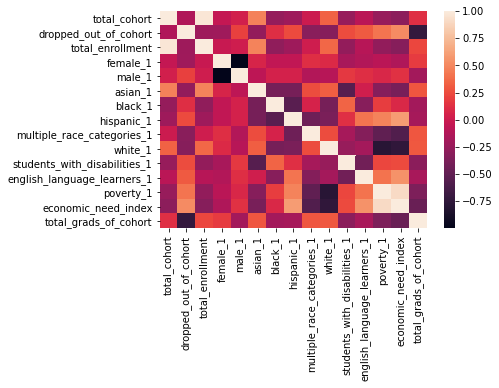

In [105]:
sns.heatmap(new_df.corr(), annot=False )
plt.show()

# Predicting graduation rates

In [123]:
X = new_df[['total_cohort','total_enrollment','female_1',
       'male_1', 'asian_1','black_1',
       'hispanic_1','multiple_race_categories_1',
       'white_1',
       'students_with_disabilities_1',
       'english_language_learners_1','poverty_1','economic_need_index','dropped_out_of_cohort']]

In [116]:
y = new_df[['total_grads_of_cohort']]

In [135]:
model1 = DecisionTreeRegressor()
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()

import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=666)

model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': 0.7585004269868295, 'Linear Regression': 0.5819040374402562, 'KNN': 0.6753837721489718}


In [124]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1966)


In [125]:
transformer = MinMaxScaler().fit(X_train)
X_train_normalized = transformer.transform(X_train)

In [126]:
X_test_normalized = transformer.transform(X_test)

In [146]:
DTR = DecisionTreeRegressor(random_state=0)
model = DTR.fit(X_train,y_train)
predictions = DTR.predict(X_train)
r2_score(y_train, predictions)

0.9946273977782077

In [143]:
predictions = lm.predict(X_test)
R2 = r2_score(y_test, predictions)

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(mean_squared_error(y_test,predictions))
MAE = mean_absolute_error(y_test,predictions)
print( 'MSE = ', MSE)
print( 'RMSE = ', RMSE)
print( 'R2 = ', R2)
print( 'MAE = ', MAE)

MSE =  15.266578260869567
RMSE =  3.907246890186179
R2 =  0.960573104720183
MAE =  1.557130434782609


# Clustering

In [86]:
len(grad_out_clustering)

22655

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

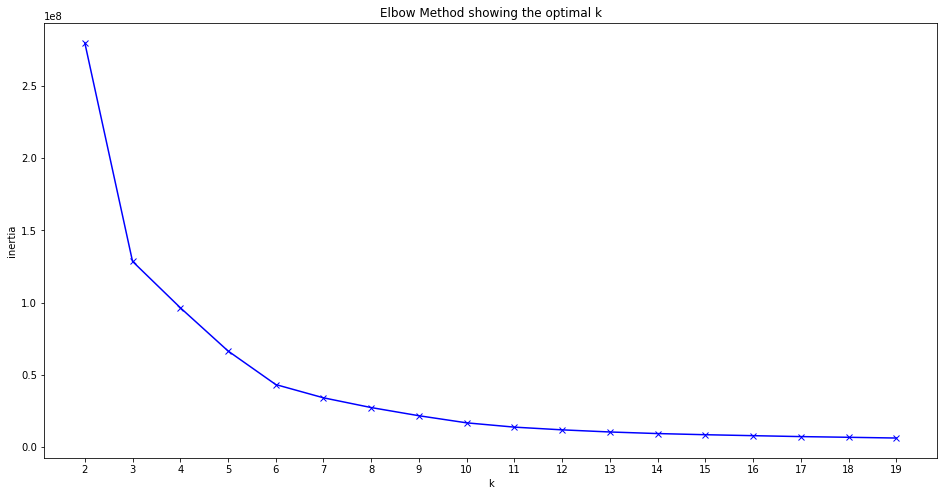

In [152]:
from sklearn.cluster import KMeans

import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

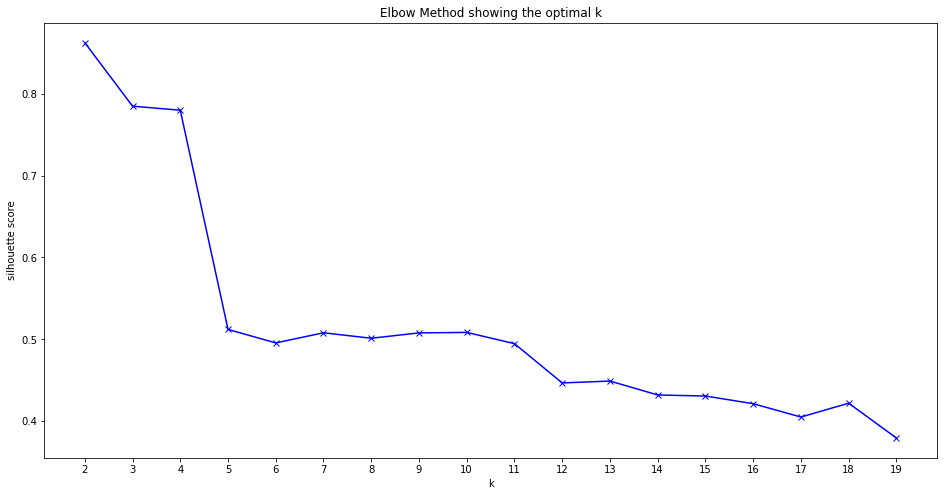

In [155]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(new_df)
    silhouette.append(silhouette_score(new_df, kmeans.predict(new_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [171]:
kmeans = KMeans(n_clusters=2, random_state=1999)
kmeans.fit(new_df)
clusters = kmeans.predict(new_df)

total_cohort


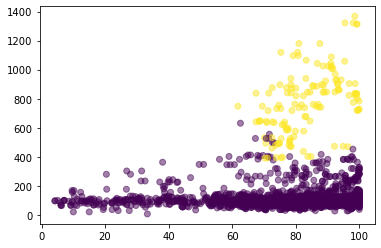

dropped_out_of_cohort


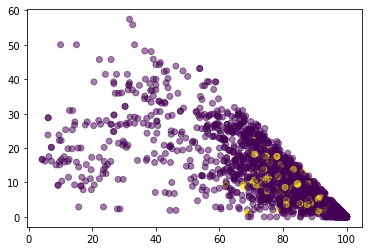

total_enrollment


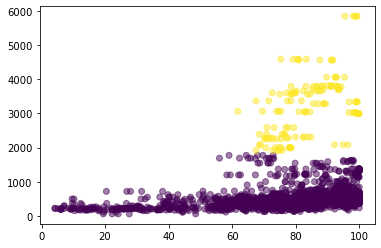

female_1


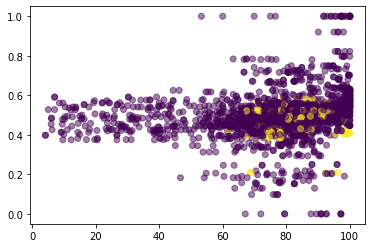

male_1


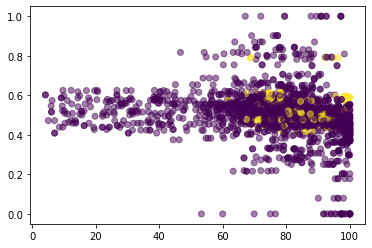

asian_1


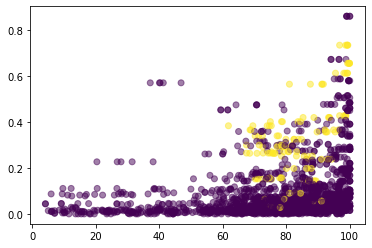

black_1


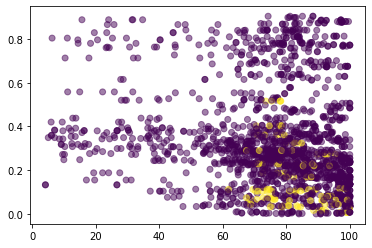

hispanic_1


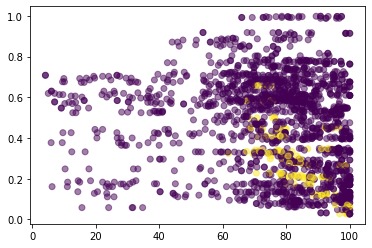

multiple_race_categories_1


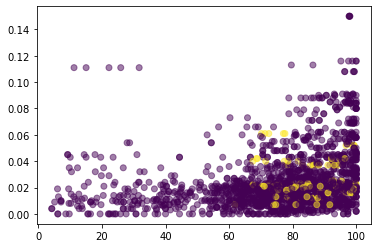

white_1


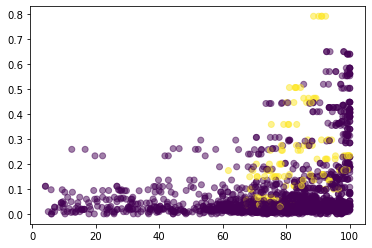

students_with_disabilities_1


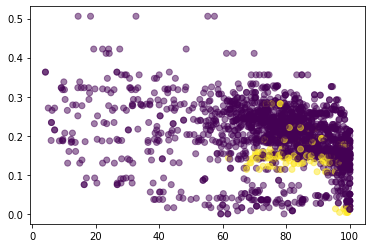

english_language_learners_1


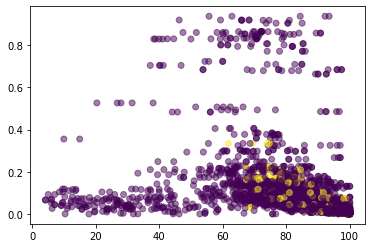

poverty_1


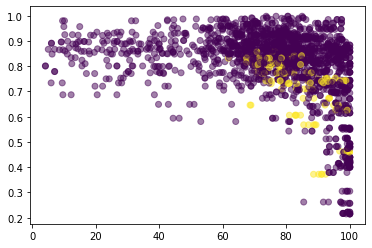

economic_need_index


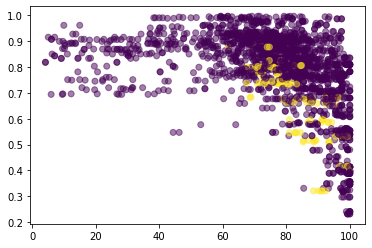

total_grads_of_cohort


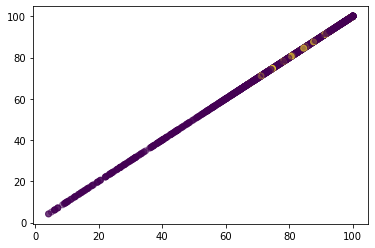

In [172]:
for col in new_df.columns :
    print(col)
    plt.scatter(new_df['total_grads_of_cohort'], new_df[col], c=clusters,alpha=0.5)
    plt.show()

In [ ]:
# clustering doesn't give me much insight into the data